In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acquired-podcast-transcripts-and-rag-evaluation/acquired_transcripts_all.txt
/kaggle/input/acquired-podcast-transcripts-and-rag-evaluation/acquired-qa-evaluation.csv
/kaggle/input/acquired-podcast-transcripts-and-rag-evaluation/acquired_metadata.csv
/kaggle/input/acquired-podcast-transcripts-and-rag-evaluation/acquired-individual-transcripts/acquired-individual-transcripts/complexity_investing_semiconductors_with_nzs_capital.txt
/kaggle/input/acquired-podcast-transcripts-and-rag-evaluation/acquired-individual-transcripts/acquired-individual-transcripts/adapting_episode_3_intel.txt
/kaggle/input/acquired-podcast-transcripts-and-rag-evaluation/acquired-individual-transcripts/acquired-individual-transcripts/retool_ceo_david_hsu_on_finding_productmarket_fit_via_sales.txt
/kaggle/input/acquired-podcast-transcripts-and-rag-evaluation/acquired-individual-transcripts/acquired-individual-transcripts/berkshire_hathaway_part_iii.txt
/kaggle/input/acquired-podcast-transcripts-and-rag

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
df = pd.read_csv('/kaggle/input/acquired-podcast-transcripts-and-rag-evaluation/acquired_metadata.csv')
df.head()

,post_url,post_title,series_number,blog_date,blog_title,file_name,has_transcript
0,https://www.acquired.fm/episodes/costco,Costco,"Season 13, Episode 2","August 20, 2023",The Complete History & Strategy of Costco,costco,True
1,https://www.acquired.fm/episodes/generative-ai...,Generative AI in Video and the Future of Story...,ACQ2 Episode,"August 29, 2023",Related Episodes,generative_ai_in_video_and_the_future_of_story...,True
2,https://www.acquired.fm/episodes/nvidia-the-da...,Nvidia Part III: The Dawn of the AI Era (2022-...,"Season 13, Episode 3","September 5, 2023",The Complete History & Strategy of Nvidia: Part 3,nvidia_part_iii_the_dawn_of_the_ai_era_20222023,True
3,https://www.acquired.fm/episodes/doug-demuro-o...,"Doug Demuro on Analyzing the Car Industry, Cre...",ACQ2 Episode,"September 17, 2023",Related Episodes,doug_demuro_on_analyzing_the_car_industry_crea...,True
4,https://www.acquired.fm/episodes/jensen-huang,NVIDIA CEO Jensen Huang,ACQ2 Episode,"October 15, 2023",Related Episodes,nvidia_ceo_jensen_huang,True


In [5]:
df.columns

Index(['post_url', 'post_title', 'series_number', 'blog_date', 'blog_title',
       'file_name', 'has_transcript'],
      dtype='object')

In [6]:
print("Dataset Info:")

Dataset Info:


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_url        275 non-null    object
 1   post_title      275 non-null    object
 2   series_number   275 non-null    object
 3   blog_date       275 non-null    object
 4   blog_title      275 non-null    object
 5   file_name       275 non-null    object
 6   has_transcript  275 non-null    bool  
dtypes: bool(1), object(6)
memory usage: 13.3+ KB
None


In [8]:
print("\nFirst 5 rows:")


First 5 rows:


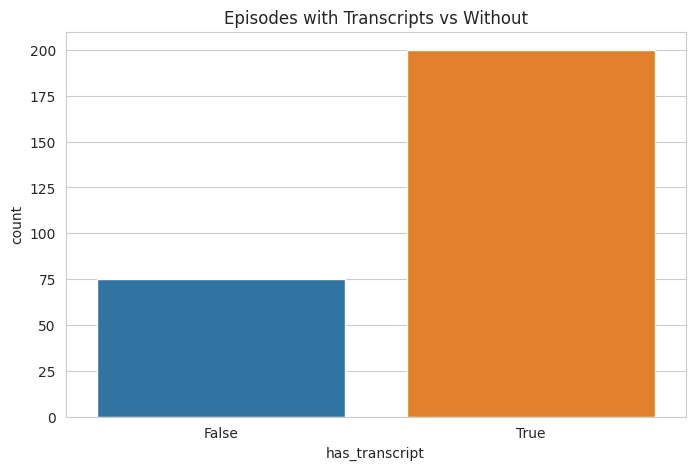

In [9]:
# Set style for plots
sns.set_style("whitegrid")

# Count of episodes with/without transcripts
plt.figure(figsize=(8, 5))
sns.countplot(x='has_transcript', data=df)
plt.title('Episodes with Transcripts vs Without')
plt.show()

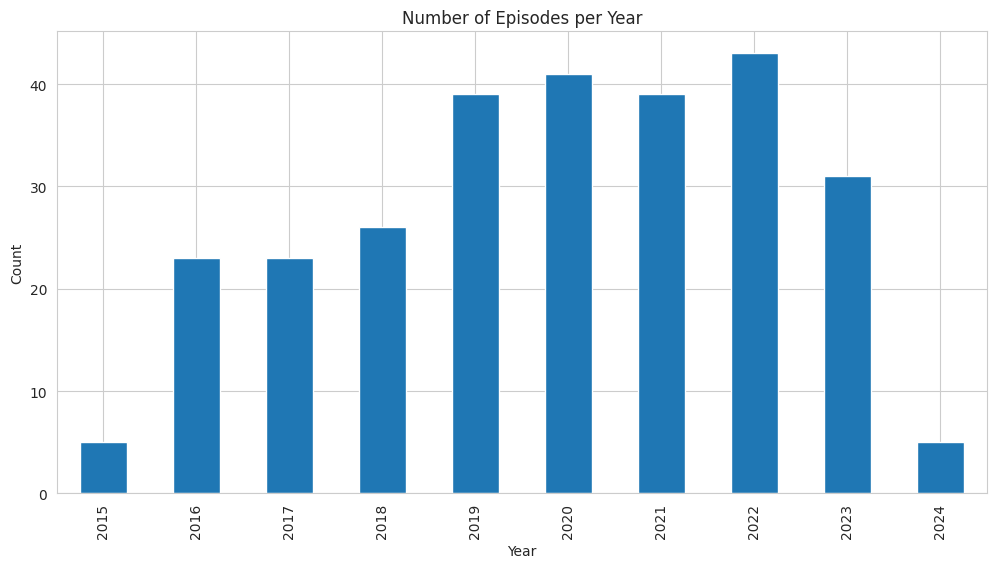

In [10]:
# Episodes over time
df['blog_date'] = pd.to_datetime(df['blog_date'])
plt.figure(figsize=(12, 6))
df.groupby(df['blog_date'].dt.year)['post_title'].count().plot(kind='bar')
plt.title('Number of Episodes per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [11]:
# Feature engineering
df['year'] = df['blog_date'].dt.year
df['month'] = df['blog_date'].dt.month

In [12]:
# Select features and target
X = df[['series_number', 'year', 'month']]
y = df['has_transcript']

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns (adjust as needed)
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [15]:
# Then train your model on the processed data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test_processed)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.58      0.67        12
        True       0.89      0.95      0.92        43

    accuracy                           0.87        55
   macro avg       0.83      0.77      0.79        55
weighted avg       0.87      0.87      0.87        55

